In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 500
t0 = 0.0
tf = 20
t = np.linspace(t0, tf, N)
dt = t[1] - t[0]

In [11]:
t_1 = np.zeros(N) #angulo do pendulo 1, varia com o tempo
t_2 = np.zeros(N) #angulo do pendulo 2, varia com o tempo

v_1 = np.zeros(N) #velocidade angular do pendulo 1, varia com o tempo, é a primeira derivada de t_1
v_2 = np.zeros(N) #velocidade angular do pendulo 2, varia com o tempo, é a primeira derivada de t_2

m1 = 5 #massa do pendulo 1, cte
m2 = 5 #massa do pendulo 2, cte

l1 = 10 #comprimento da haste do primeiro pendulo, cte
l2 = 10 #comprimento da haste do segundo pendulo, cte

g = 9.87 #aceleracao da gravidade, cte

In [12]:
t_1[0] = np.pi/2
v_1[0] = 0
t_2[0] = np.pi/3
v_2[0] = 0

In [ ]:
for n in range(N - 1):
    numerador_t_1 = -1*g*(2*m1 + m2)*np.sin(t_1[n]) - m2*g*np.sin(t_1[n]-2*t_2[n]) - 2*np.sin(t_1[n]-t_2[n])*m2*((v_2[n]**2)*l2 + (v_1[n]**2)*l1*np.cos(t_1[n] - t_2[n]))
    denominador_t_1 = l1*(2*m1 + m2 - m2*np.cos(2*t_1[n] - 2*t_2[n]))

    numerador_t_2 = 2*np.sin(t_1[n] - t_2[n])*(v_1[n]**2*l1*(m1+m2) + g*(m1+m2)*np.cos(t_1[n]) + v_2[n]**2*l2*m2*np.cos(t_1[n] - t_2[n]))
    denominador_t_2 = l2*(2*m1 + m2 - m2*np.cos(2*t_1[n] - 2*t_2[n]))

    t_1[n + 1] = t_1[n] + dt * v_1[n]
    v_1[n + 1] = v_1[n] + dt * (numerador_t_1 / denominador_t_1)
    t_2[n + 1] = t_2[n] + dt * v_2[n]
    v_2[n + 1] = v_2[n] + dt * (numerador_t_2 / denominador_t_2)

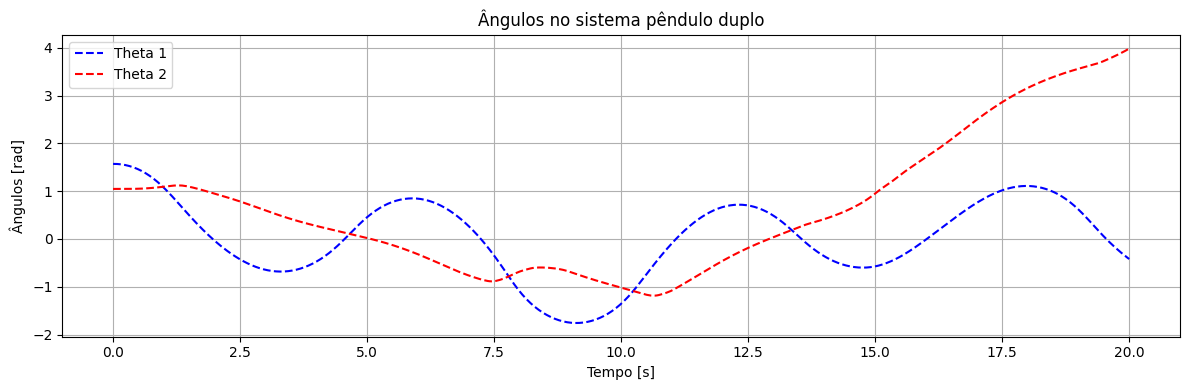

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(t, t_1,'--b', label='Theta 1')
plt.plot(t, t_2,'--r', label='Theta 2')
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulos [rad]')
plt.title('Ângulos no sistema pêndulo duplo')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()